In [212]:
import warnings
warnings.simplefilter(action='ignore')

In [213]:
import numpy as np
import pandas as pd

In [214]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [215]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, balanced_accuracy_score, f1_score, log_loss, plot_confusion_matrix

In [216]:
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [217]:
from sklearn.model_selection import cross_val_score

In [218]:
import seaborn as sns

In [219]:
### 1. Load the Wine dataset from sklearn.datasets and split it into train and test sets. Use 30% of the data for testing and a random state of 42.
wine = datasets.load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [220]:
df_wine = pd.DataFrame(data=np.c_[wine['data'], wine['target']],
                       columns=wine['feature_names'] + ['target'])
df_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


In [221]:
### 2. Conduct Explorative Data Analysis (EDA) on the dataset and perform feature engineering if you see that it is necessary.
# https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee
df_wine.duplicated().sum()
# drop columns if necessary

0

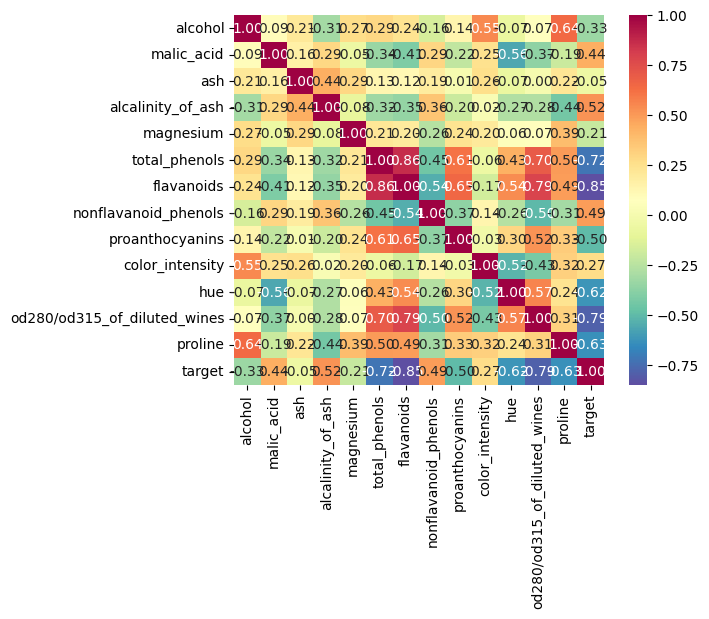

In [222]:
corrmat = df_wine.corr()
hm = sns.heatmap(corrmat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=df_wine.columns,
                 xticklabels=df_wine.columns,
                 cmap="Spectral_r")
plt.show()

In [223]:
df_wine = df_wine.drop(columns=['flavanoids', 'total_phenols'])

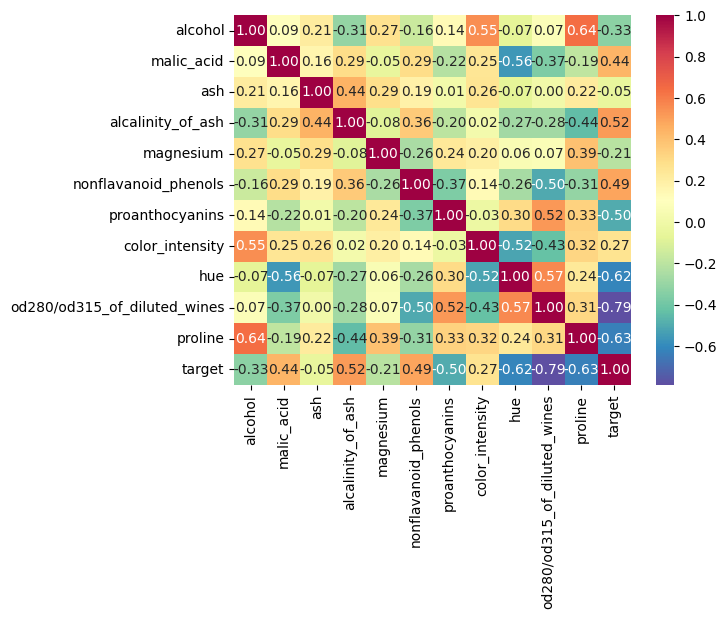

In [224]:
corrmat = df_wine.corr()
hm = sns.heatmap(corrmat,
                 cbar=True,
                 annot=True,
                 fmt='.2f',
                 yticklabels=df_wine.columns,
                 xticklabels=df_wine.columns,
                 cmap="Spectral_r")
plt.show()

In [225]:
df_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,0.52,1.06,7.70,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,0.53,1.46,9.30,0.60,1.62,840.0,2.0


In [226]:
X = df_wine.drop(['target'], axis=1)
y = df_wine['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [227]:
### 3. Train and compare the results of the following classifiers: Logistic Regression
log_reg_clf = LogisticRegression(max_iter=100, random_state=42)
log_reg_clf.fit(X_train, y_train)
log_reg_pred = log_reg_clf.predict(X_test)
log_reg_proba = log_reg_clf.predict_proba(X_test)
print(classification_report(y_test, log_reg_pred))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        19
         1.0       1.00      1.00      1.00        21
         2.0       1.00      0.93      0.96        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



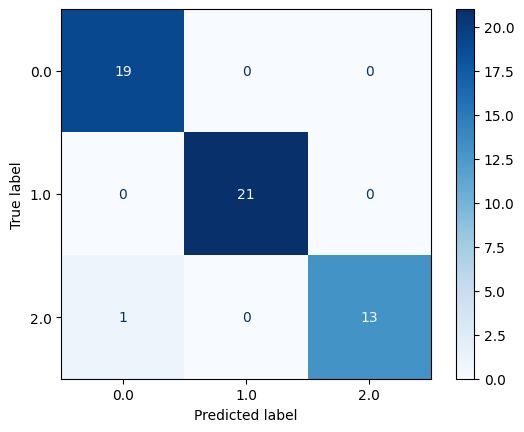

In [228]:
plot_confusion_matrix(log_reg_clf, X_test, y_test, cmap=plt.cm.Blues)

In [229]:
print('Accuracy: ', balanced_accuracy_score(y_test, log_reg_pred))
print('F1 score: ', f1_score(y_test, log_reg_pred, average='weighted'))
print('Log loss: ', log_loss(y_test, log_reg_proba))

Accuracy:  0.9761904761904763
F1 score:  0.9813759628574443
Log loss:  0.14510882875022388


In [230]:
### Gaussian Naive Bayes
gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)
gnb_pred = gnb_clf.predict(X_test)
gnb_proba = gnb_clf.predict_proba(X_test)
print(classification_report(y_test, gnb_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        19
         1.0       1.00      1.00      1.00        21
         2.0       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



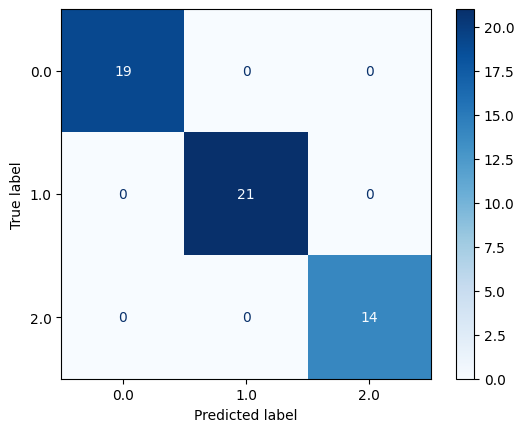

In [231]:
plot_confusion_matrix(gnb_clf, X_test, y_test, cmap=plt.cm.Blues)

In [232]:
print('Accuracy: ', balanced_accuracy_score(y_test, gnb_pred))
print('F1 score: ', f1_score(y_test, gnb_pred, average='weighted'))
print('Log loss: ', log_loss(y_test, gnb_proba))

Accuracy:  1.0
F1 score:  1.0
Log loss:  0.004754004558030374


In [236]:
### K-Nearest Neighbors
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)
knn_pred = knn_clf.predict(X_test)
knn_proba = knn_clf.predict_proba(X_test)
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89        19
         1.0       0.75      0.71      0.73        21
         2.0       0.53      0.57      0.55        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54



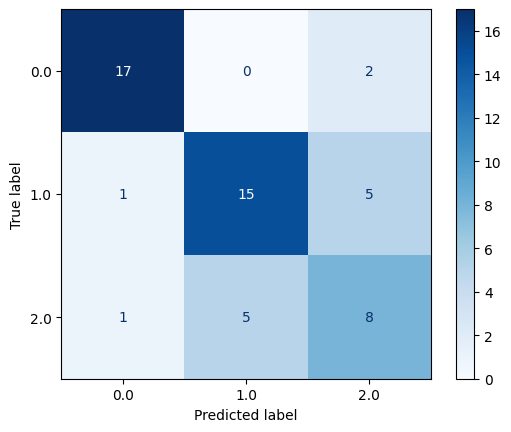

In [237]:
plot_confusion_matrix(knn_clf, X_test, y_test, cmap=plt.cm.Blues)

In [238]:
print('Accuracy: ', balanced_accuracy_score(y_test, knn_pred))
print('F1 score: ', f1_score(y_test, knn_pred, average='weighted'))
print('Log loss: ', log_loss(y_test, knn_proba))

Accuracy:  0.7268170426065163
F1 score:  0.7424072516587233
Log loss:  4.082993941999978


In [240]:
knn_clf = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 25),
              'p': range(1, 5),
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}
knn_clf_grid = GridSearchCV(knn_clf, param_grid, n_jobs=-1, verbose=1, cv=None)
knn_clf_grid.fit(X_train, y_train)
print('Best parameters: ', knn_clf_grid.best_params_)

Fitting 5 folds for each of 768 candidates, totalling 3840 fits
Best parameters:  {'metric': 'manhattan', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}


In [241]:
knn_clf_best = knn_clf_grid.best_estimator_
knn_clf_best.fit(X_train, y_train)
knn_best_pred = knn_clf_best.predict(X_test)
knn_best_proba = knn_clf_best.predict_proba(X_test)
print(classification_report(y_test, knn_best_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87        19
         1.0       0.81      0.81      0.81        21
         2.0       0.77      0.71      0.74        14

    accuracy                           0.81        54
   macro avg       0.81      0.81      0.81        54
weighted avg       0.81      0.81      0.81        54



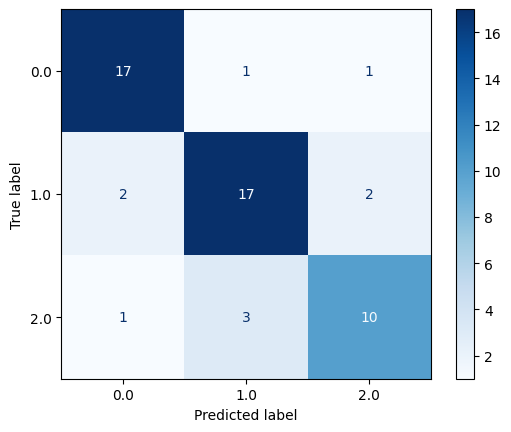

In [242]:
plot_confusion_matrix(knn_clf_best, X_test, y_test, cmap=plt.cm.Blues)

In [243]:
print('Accuracy: ', balanced_accuracy_score(y_test, knn_best_pred))
print('F1 score: ', f1_score(y_test, knn_best_pred, average='weighted'))
print('Log loss: ', log_loss(y_test, knn_best_proba))

Accuracy:  0.8061821219715957
F1 score:  0.8136013506383878
Log loss:  6.396069702761239


In [244]:
### Decision Tree
from sklearn import tree
tree_clf = tree.DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [245]:
tree_pred = tree_clf.predict(X_test)
tree_proba = tree_clf.predict_proba(X_test)
print(classification_report(y_test, tree_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87        19
         1.0       0.76      0.90      0.83        21
         2.0       1.00      0.64      0.78        14

    accuracy                           0.83        54
   macro avg       0.87      0.81      0.83        54
weighted avg       0.85      0.83      0.83        54



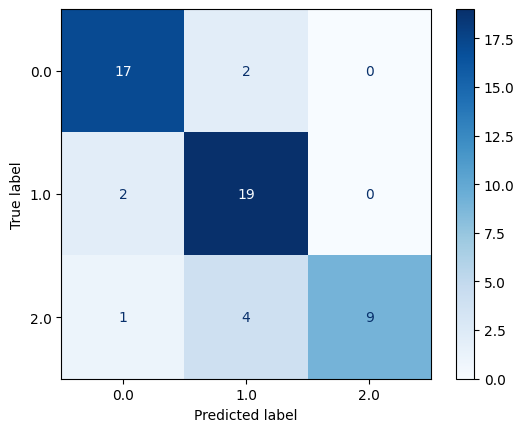

In [246]:
plot_confusion_matrix(tree_clf, X_test, y_test, cmap=plt.cm.Blues)

In [247]:
print('Accuracy: ', balanced_accuracy_score(y_test, tree_pred))
print('F1 score: ', f1_score(y_test, tree_pred, average='weighted'))
print('Log loss: ', log_loss(y_test, tree_proba))

Accuracy:  0.8141186299081036
F1 score:  0.8308972294479541
Log loss:  5.756462732485115


In [ ]:
### Random Forest
from sklearn.ensemble import RandomForestClassifier
rnd_for_clf = RandomForestClassifier(n_estimators=100)
rnd_for_clf.fit(X_train, y_train)
rnd_for_pred = rnd_for_clf.predict(X_test)

In [ ]:
### Support Vector Machine. Use the default parameters for each classifier

In [235]:
### 4. Use GridSearchCV to find the best hyper-parameters for the K-Nearest Neighbors classifier, Random Forest classifier, and Support Vector Machine classifier. [Refer to the SKLearn documentation for details on the hyper-parameters for each model].
### 5. Use cross-validation to evaluate the classifiers after hyper-parameter tuning.